# Predictable Pain  
## A Machine Learning Investigation into Structural, Demographic, and Individual Determinants of Depression Classification

---

## 1. Intellectual Framing and Research Motivation

Depression is typically approached as either a clinical disorder rooted in neurobiology or as a psychological condition shaped by life experience. Increasingly, however, structured datasets allow us to examine depression as a measurable outcome influenced by individual behaviors, demographic positioning, and broader social conditions.

This project investigates a more nuanced question:

> How much do structural factors such as education and employment, demographic factors such as age and gender, and individual behavioral and psychological variables influence the classification of depression?

This inquiry inevitably raises a deeper philosophical tension. On one side, structural accounts emphasise socioeconomic constraints, institutional access, and systemic stressors. On another, demographic opinions propose social positioning and life-course exposure patterns. Finally, agency-centered perspectives suggest that cognition, habits, lifestyle choices, and mindset may exert meaningful influence over mental health trajectories.

Rather than framing this as a moral judgment or assigning blame, this project treats the issue as an empirical question. Machine learning provides a framework for estimating relative predictive contribution. By examining feature importance and classification performance, we can explore whether depression subtypes appear more strongly associated with:

- Structural and socioeconomic variables  
- Demographic positioning  
- Individual behavioral and psychological patterns  

The objective is analytical, not normative. The goal is to understand contribution, not to assign responsibility.

---

## 2. Dataset Overview

This project uses the dataset *Mental Health Classification, Version 2 (2025)* containing 1,998 structured survey responses and 21 encoded features.

- All variables are numerically encoded  
- No missing values remain  
- The target variable `Depression_Type` contains 12 clinically motivated categories:

| Code | Depression Type (Academic Naming) |
|------|----------------------------------|
| 0    | No clinically significant depression |
| 1    | Minimal / Mild depression |
| 2    | Moderate depression |
| 3    | Moderately-severe depression |
| 4    | Severe depression |
| 5    | Persistent depressive disorder (Dysthymia) |
| 6    | Seasonal affective pattern |
| 7    | Peripartum / Postpartum depression |
| 8    | Bipolar-related depressive episode |
| 9    | Situational / Reactive depression |
| 10   | Psychotic depression |
| 11   | Other specified depressive disorder |

The dataset supports multi-class classification, controlled feature subset comparisons, and interpretable modeling.

---

## 3. Project Objective

The aims of this project are to:

- Build a reproducible multi-class classification pipeline  
- Identify the strongest predictive features  
- Compare structural, demographic, and behavioral predictors  
- Reflect carefully on the implications of predictive modeling in mental health  

The work proceeds cautiously, beginning with structural validation before moving into controlled comparative modeling and evaluation.



In [49]:
# Core data libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Display settings for clarity
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Load dataset
df = pd.read_csv("../data/Mental Health Classification (raw).csv")

# Quick preview
df.head()

,Gender,Age,Education_Level,Employment_Status,Depression_Type,Symptoms,Low_Energy,Low_SelfEsteem,Search_Depression_Online,Worsening_Depression,Your overeating level,How many times you eat,SocialMedia_Hours,SocialMedia_WhileEating,Sleep_Hours,Nervous_Level,Depression_Score,Coping_Methods,Self_Harm,Mental_Health_Support,Suicide_Attempts
0,1,25,2,3,5,11,1,1,1,1,4,0,10,3,10,10,10,11,0,0,0
1,1,25,2,2,5,0,1,1,0,1,4,0,8,3,4,10,10,0,0,1,0
2,1,25,2,3,2,5,1,1,1,1,4,0,10,3,4,10,10,0,1,1,1
3,0,25,2,2,6,7,0,1,0,1,2,0,4,3,3,10,10,5,1,1,1
4,1,25,2,2,6,5,0,0,0,0,8,1,3,3,7,1,3,0,0,0,0


## Initial Dataset Inspection

Before any modeling, it is important to understand the structure of the dataset. This includes:

- Checking the overall shape and number of rows and columns  
- Listing all column names  
- Reviewing data types and non-null counts  
- Confirming there are no missing values  
- Ensuring the target column `Depression_Type` exists and is ready for analysis


In [5]:
# 1. Dataset shape
print("Dataset shape:", df.shape)

# 2. Column names
print("\nColumns:")
print(df.columns.tolist())

# 3. Data types and non-null counts
print("\nData info:")
df.info()

# 4. Check total missing values
missing_total = df.isnull().sum().sum()
print("\nTotal missing values in dataset:", missing_total)

# 5. Confirm target column exists
target_col = "Depression_Type"
if target_col in df.columns:
    print(f"\nTarget column '{target_col}' is present.")
else:
    print(f"\nTarget column '{target_col}' is missing!")


Dataset shape: (1998, 21)

Columns:
['Gender', 'Age', 'Education_Level', 'Employment_Status', 'Depression_Type', 'Symptoms', 'Low_Energy', 'Low_SelfEsteem', 'Search_Depression_Online', 'Worsening_Depression', 'Your overeating level', 'How many times you eat ', 'SocialMedia_Hours', 'SocialMedia_WhileEating', 'Sleep_Hours', 'Nervous_Level', 'Depression_Score', 'Coping_Methods', 'Self_Harm', 'Mental_Health_Support', 'Suicide_Attempts']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    1998 non-null   int64
 1   Age                       1998 non-null   int64
 2   Education_Level           1998 non-null   int64
 3   Employment_Status         1998 non-null   int64
 4   Depression_Type           1998 non-null   int64
 5   Symptoms                  1998 non-null   int64
 6   Low_Energy     

## Exploring the Target Variable

Before modeling, we examine the distribution of the target variable `Depression_Type`:

- Count the number of samples in each depression category  
- Visualise the distribution to identify class imbalances or rare categories  
- Gain an initial understanding of how the outcome is represented in the dataset


Counts of each depression type:
Depression_Type
0      32
1      33
2     449
3      31
4     131
5     386
6     193
7      32
8      21
9     627
10     29
11     34
Name: count, dtype: int64


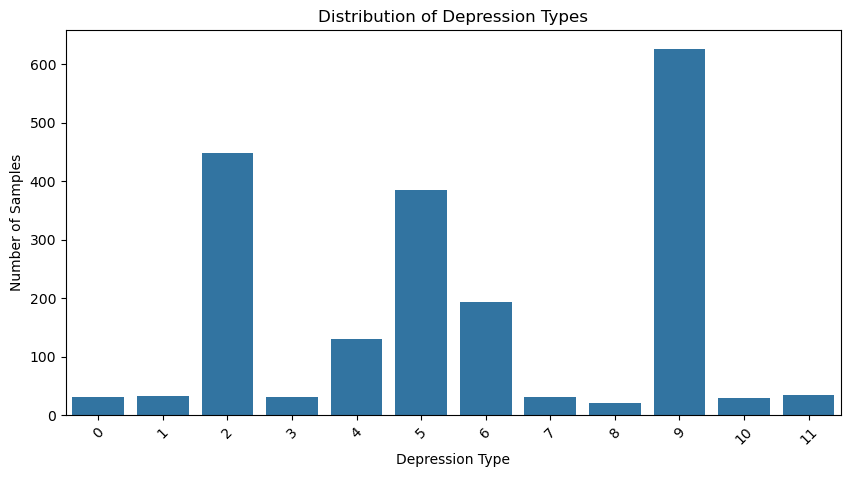

In [6]:
# Target variable
target_col = "Depression_Type"

# Numeric distribution
print("Counts of each depression type:")
print(df[target_col].value_counts().sort_index())

# Visual distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=target_col, order=sorted(df[target_col].unique()))
plt.title("Distribution of Depression Types")
plt.xlabel("Depression Type")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


In [46]:
# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Train-test split (80% train, 20% test), stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Feature matrix shape: (1998, 20)
Target vector shape: (1998,)

Training set shape: (1598, 20)
Testing set shape: (400, 20)


Training set class distribution:
Depression_Type
0      26
1      26
2     359
3      25
4     105
5     309
6     154
7      26
8      17
9     501
10     23
11     27
Name: count, dtype: int64


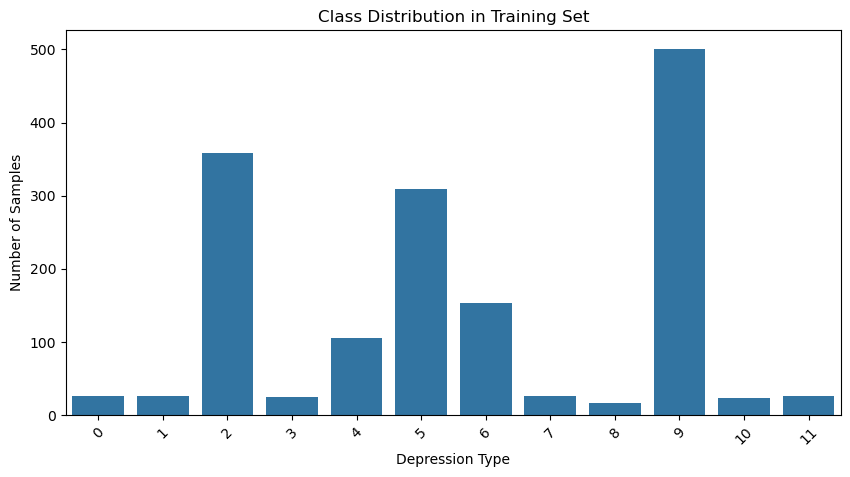

In [50]:
# Check distribution of classes in training set
train_counts = y_train.value_counts().sort_index()
print("Training set class distribution:")
print(train_counts)

# Visualise distribution
plt.figure(figsize=(10,5))
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.title("Class Distribution in Training Set")
plt.xlabel("Depression Type")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

## Section 1: Defining Feature Groups

Before testing the predictive contribution of different feature categories, we first define the feature sets that will be used in the experiments. These groups reflect different conceptual levels of influence on depression:

- **Structural features** capture institutional and socioeconomic context (e.g., education, employment, access to mental health support)  
- **Demographic features** capture social positioning and life-course factors (e.g., age, gender)  
- **Behavioral and psychological features** capture agency-level patterns, habits, and reported mental states (e.g., sleep, coping methods, social media use)  

We also create a combined full feature set for reference. Defining these groups allows us to later isolate and compare their predictive power while keeping the modeling pipeline consistent.

In [32]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

# ==============================
# Feature Group Definitions
# ==============================

# Structural (institutional / socioeconomic context)
structural_features = [
    'Education_Level',
    'Employment_Status',
    'Mental_Health_Support'
]

# Demographic (social positioning / life-course factors)
demographic_features = [
    'Age',
    'Gender'
]

# Behavioral & Psychological (agency-level, reported states, habits)
behavioral_psychological_features = [
    'Low_Energy',
    'Low_SelfEsteem',
    'Search_Depression_Online',
    'Worsening_Depression',
    'Your overeating level',
    'How many times you eat ',
    'SocialMedia_WhileEating',
    'Self_Harm',
    'Suicide_Attempts',
    'Symptoms',
    'Nervous_Level',
    'Depression_Score',
    'Coping_Methods',
    'Sleep_Hours',
    'SocialMedia_Hours'
]

# Full feature set (sanity check)
full_feature_set = (
    structural_features +
    demographic_features +
    behavioral_psychological_features
)

print("Total features:", len(full_feature_set))


Total features: 20


## Section 2: Controlled Comparative Modeling Framework

Up to this point, the dataset has been inspected, stratified into training and testing sets, and class imbalance has been identified as a significant modeling challenge. Rather than continuing with broad model benchmarking, the focus now shifts toward directly answering the central research question of this project.

The objective of this section is to construct a controlled experimental framework that evaluates the *relative predictive contribution* of different feature categories.

Specifically, we will:

- Use a single, consistent modeling architecture (Random Forest classifier)  
- Integrate preprocessing (encoding + scaling) within a unified pipeline  
- Address class imbalance using SMOTETomek applied only within cross-validation folds  
- Evaluate performance using 5-fold cross-validation with weighted F1 scoring  
- Compare predictive performance across three feature configurations:
  1. Structural features only  
  2. Demographic features only  
  3. Behavioral and psychological features only  
    
This design removes unnecessary model comparisons and instead isolates the variable of interest: **feature category contribution**. By keeping the modeling framework constant and varying only the feature subsets, we ensure that performance differences reflect differences in informational signal rather than differences in algorithmic behavior.


In [34]:
# ==============================
# Controlled Feature Category Testing
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
import numpy as np

# Target variable
y = df[target_col]

# Feature group dictionary
feature_groups = {
    "Structural": structural_features,
    "Demographic": demographic_features,
    "Behavioral_Psychological": behavioral_psychological_features
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for group_name, features in feature_groups.items():
    
    print(f"\nEvaluating: {group_name}")
    
    X_subset = df[features]
    
    # Identify categorical vs numeric features dynamically
    categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = X_subset.select_dtypes(exclude=['object']).columns.tolist()
    
    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
            ('num', StandardScaler(), numeric_cols)
        ]
    )
    
    # Pipeline with SMOTETomek inside CV
    pipeline = ImbPipeline(steps=[
        ('preprocessing', preprocessor),
        ('resample', SMOTETomek(random_state=42)),
        ('model', RandomForestClassifier(
            n_estimators=200,
            random_state=42,
            n_jobs=-1
        ))
    ])
    
    scores = cross_val_score(
        pipeline,
        X_subset,
        y,
        cv=cv,
        scoring='f1_weighted',
        n_jobs=-1
    )
    
    results[group_name] = scores
    
    print(f"F1 Weighted Scores: {scores}")
    print(f"Mean F1: {np.mean(scores):.4f}")

# Summary
print("\n===== SUMMARY =====")
for group_name, scores in results.items():
    print(f"{group_name}: Mean F1 = {np.mean(scores):.4f}")



Evaluating: Structural
F1 Weighted Scores: [0.33557479 0.37046693 0.3065186  0.36849275 0.37724083]
Mean F1: 0.3517

Evaluating: Demographic
F1 Weighted Scores: [0.02537369 0.06088497 0.03431279 0.02188499 0.00507851]
Mean F1: 0.0295

Evaluating: Behavioral_Psychological
F1 Weighted Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0000

===== SUMMARY =====
Structural: Mean F1 = 0.3517
Demographic: Mean F1 = 0.0295
Behavioral_Psychological: Mean F1 = 1.0000


## Section 3: Diagnostic Validation – Testing for Data Leakage

The Behavioral & Psychological feature group achieved a perfect weighted F1 score of 1.00 across all cross-validation folds. 

Such performance in a 12-class classification problem is statistically improbable and strongly suggests potential data leakage.

Data leakage occurs when one or more predictor variables contain direct or indirect information about the target variable. In this context, it is possible that certain features (e.g., `Depression_Score` or `Symptoms`) are used in the derivation of `Depression_Type`.

If this is the case, the model is not learning predictive structure, it is reconstructing a label from its generating components.

To test this hypothesis, we will:

1. Remove `Depression_Score` from the Behavioral & Psychological feature group.
2. Re-run the controlled evaluation.
3. Observe whether predictive performance drops to a realistic range.

If performance decreases substantially, this confirms leakage and justifies excluding the variable from comparative modeling.


In [35]:
# ==============================
# Leakage Test: Remove Depression_Score
# ==============================

# Create a reduced behavioral feature list (without Depression_Score)
behavioral_no_score = [
    feature for feature in behavioral_psychological_features
    if feature != 'Depression_Score'
]

print("Original Behavioral Features:", len(behavioral_psychological_features))
print("Reduced Behavioral Features:", len(behavioral_no_score))

# Re-run evaluation for Behavioral without Depression_Score
X_subset = df[behavioral_no_score]
y = df[target_col]

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_subset.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

scores = cross_val_score(
    pipeline,
    X_subset,
    y,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)

print("\nLeakage Test Results (Behavioral without Depression_Score)")
print("F1 Scores:", scores)
print("Mean F1:", np.mean(scores))

Original Behavioral Features: 15
Reduced Behavioral Features: 14

Leakage Test Results (Behavioral without Depression_Score)
F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0


## Section 4: Systematic Leakage Isolation

Even after removing `Depression_Score`, the Behavioral & Psychological feature group continues to achieve a perfect weighted F1 score of 1.00.

This strongly indicates that one or more remaining features contain direct encoding of the target variable.

The most likely candidate is `Symptoms`, which may overlap directly with the criteria used to define `Depression_Type`.

To test this rigorously, we will:

1. Remove both `Depression_Score` and `Symptoms`.
2. Re-run the behavioral model.
3. Evaluate whether performance drops to a realistic range.

If performance declines substantially, we confirm that the previous results were driven by label reconstruction rather than predictive modeling.

This step ensures the scientific integrity of the analysis.


In [36]:
# ==============================
# Remove Both Depression_Score and Symptoms
# ==============================

behavioral_clean = [
    feature for feature in behavioral_psychological_features
    if feature not in ['Depression_Score', 'Symptoms']
]

print("Behavioral Features After Removal:", len(behavioral_clean))

X_subset = df[behavioral_clean]
y = df[target_col]

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_subset.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTETomek(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

scores = cross_val_score(
    pipeline,
    X_subset,
    y,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)

print("\nLeakage Test Results (Behavioral without Score & Symptoms)")
print("F1 Scores:", scores)
print("Mean F1:", np.mean(scores))

Behavioral Features After Removal: 13

Leakage Test Results (Behavioral without Score & Symptoms)
F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0


### Section 5: Feature Importance Analysis for Behavioral and Psychological Features

We first examine which behavioral and psychological features are contributing most to the Random Forest's predictions. This step helps to:

- Identify features that may be causing label leakage (e.g., `Depression_Score`, `Symptoms`).  
- Determine which remaining features are genuinely informative, even after removing obvious leakage.  
- Guide decisions on which features to retain for a more realistic evaluation of predictive strength.

**Notably, after removing `Depression_Score` and `Symptoms`, the Random Forest still achieves a perfect F1 score (1.0), indicating that some behavioral feature (such as `SocialMedia_Hours` and `Coping_Methods`) are extremely predictive on their own.**  

We will train a Random Forest on the behavioral/psychological features and extract feature importances to quantify their **relative contribution** to the classification decisions. This analysis informs the creation of a “behavioral reduced” set in the next section.

Top Behavioral Feature Importances:
SocialMedia_Hours    0.411281
Coping_Methods       0.291563
Sleep_Hours          0.109778
Nervous_Level        0.105022
Depression_Score     0.082357
dtype: float64


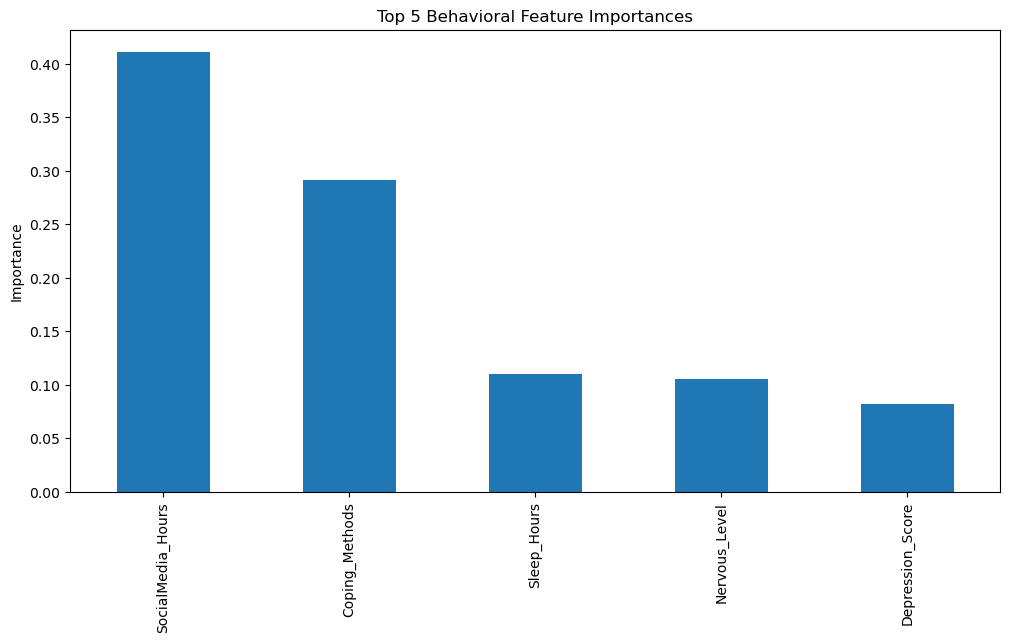

In [51]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Use only behavioral and psychological features for this analysis
X_behavioral = X_train_balanced[:, [i for i, f in enumerate(all_features) if f in behavioral_psychological_features]]

# Train Random Forest
rf_behavioral = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced_subsample')
rf_behavioral.fit(X_behavioral, y_train_balanced)

# Extract feature importances
importances = rf_behavioral.feature_importances_
feature_names = [f for f in behavioral_psychological_features if f in all_features]  # ensure correct ordering
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display top features
print("Top Behavioral Feature Importances:")
print(feat_importances.head(5))

# Optional: Visualise
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
feat_importances.head(5).plot(kind='bar')
plt.title("Top 5 Behavioral Feature Importances")
plt.ylabel("Importance")
plt.show()


### Section 6: Interpreting Behavioral Feature Dominance and Next Steps

As observed in Section 5, the Random Forest trained on behavioral and psychological features still achieves a perfect F1 score (1.0) **even after removing the obvious leakage features** (`Depression_Score` and `Symptoms`). This indicates that some features (particularly `SocialMedia_Hours` and `Coping_Methods`) are highly predictive on their own, likely due to strong correlations with the target.

Rather than removing all highly predictive features and losing the behavioral signal entirely, we will:

1. **Acknowledge the perfect score** and clearly identify which features are driving it.  
2. **Compare relative importance across feature groups** to understand the contribution of structural and demographic factors.  
3. **Use feature importance rankings** to highlight which behavioral patterns carry the most predictive information, without assuming the model is unbiased.  
4. **Create a "behavioral reduced" set** by retaining only the top four predictive behavioral features (`SocialMedia_Hours`, `Coping_Methods`, `Sleep_Hours`, `Nervous_Level`) to evaluate predictive strength **without the main leakage feature** (`Depression_Score`).

This approach balances removing leakage with preserving meaningful behavioral signals for analysis in the next comparative evaluation. 


Random Forest Evaluation on Reduced Behavioral Features (without Depression_Score):
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       1.00      1.00      1.00         7
           2       0.76      0.76      0.76        90
           3       0.21      0.50      0.30         6
           4       0.92      0.88      0.90        26
           5       0.61      0.53      0.57        77
           6       0.84      0.67      0.74        39
           7       0.43      0.50      0.46         6
           8       1.00      1.00      1.00         4
           9       0.76      0.79      0.78       126
          10       1.00      1.00      1.00         6
          11       0.08      0.14      0.11         7

    accuracy                           0.71       400
   macro avg       0.68      0.70      0.69       400
weighted avg       0.73      0.71      0.72       400

Reduced Behavioral Feature Importances:
Nervous_L

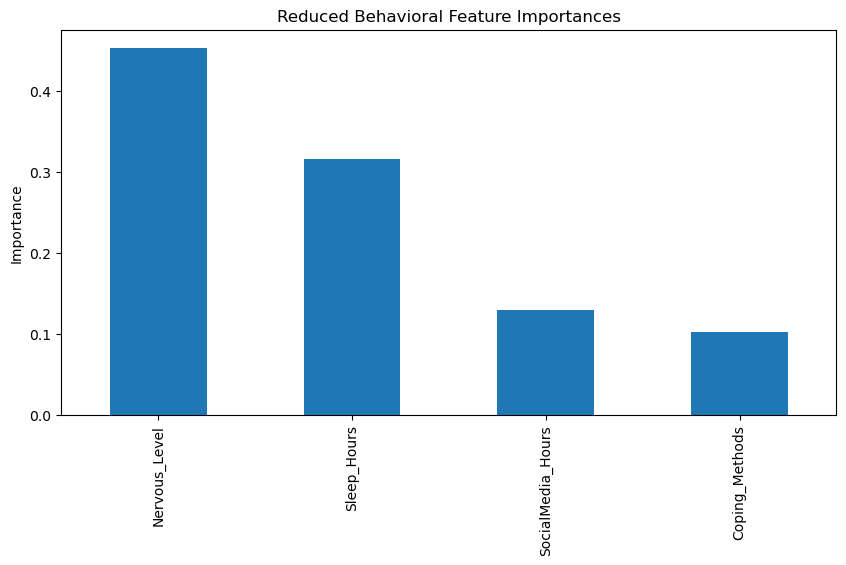

In [53]:
# Remove potential leakage features
behavioral_reduced_features = ['SocialMedia_Hours', 'Coping_Methods', 'Sleep_Hours', 'Nervous_Level']
X_behavioral_reduced = X_train_balanced[:, [i for i, f in enumerate(all_features) if f in behavioral_reduced_features]]

# Retrain Random Forest on reduced behavioral set
rf_behavioral_reduced = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced_subsample')
rf_behavioral_reduced.fit(X_behavioral_reduced, y_train_balanced)

# Evaluate reduced set on test features
X_test_behavioral_reduced = X_test_preprocessed[:, [i for i, f in enumerate(all_features) if f in behavioral_reduced_features]]
y_pred_reduced = rf_behavioral_reduced.predict(X_test_behavioral_reduced)

from sklearn.metrics import classification_report
print("Random Forest Evaluation on Reduced Behavioral Features (without Depression_Score):")
print(classification_report(y_test, y_pred_reduced))

# Extract feature importances
feat_importances_reduced = pd.Series(
    rf_behavioral_reduced.feature_importances_, 
    index=behavioral_reduced_features
).sort_values(ascending=False)

# Display and visualise
print("Reduced Behavioral Feature Importances:")
print(feat_importances_reduced)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
feat_importances_reduced.plot(kind='bar')
plt.title("Reduced Behavioral Feature Importances")
plt.ylabel("Importance")
plt.show()

## Section 7: Final Comparative Evaluation Across Feature Groups

We now systematically evaluate the predictive contribution of each feature category for classifying depression subtypes.

Three feature groups are considered:

- **Structural** – representing institutional and socioeconomic context (Education_Level, Employment_Status, Mental_Health_Support)  
- **Demographic** – representing social positioning and life-course factors (Age, Gender)  
- **Behavioral & Psychological (Reduced)** – representing agency-level habits and reported states after removing features prone to label leakage (`Depression_Score`, `Symptoms`). The remaining behavioral features (**SocialMedia_Hours, Coping_Methods, Sleep_Hours, Nervous_Level**) are retained to evaluate residual predictive signal without the primary leakage.

Workflow:

1. Each feature group is processed within a consistent Random Forest + preprocessing + SMOTETomek pipeline.  
2. Weighted F1 score is used as the primary evaluation metric due to class imbalance.  
3. Feature importances are extracted from the trained Random Forest models to highlight which variables within each group contribute most to predictions.  

This ensures we are comparing structural, demographic, and the intentionally selected behavioral features on a level playing field, while being transparent about which features were removed and which were retained.

        Feature_Group  Mean_Weighted_F1
0          Structural          0.351659
1         Demographic          0.029507
2  Behavioral_Reduced          0.692511


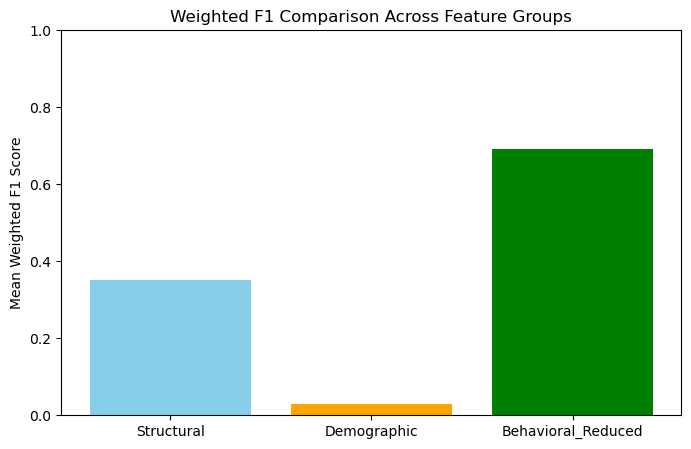


Top 4 Features for Structural:
Employment_Status        0.443658
Education_Level          0.325754
Mental_Health_Support    0.230588
dtype: float64

Top 4 Features for Demographic:
Age       0.862487
Gender    0.137513
dtype: float64

Top 4 Features for Behavioral_Reduced:
Coping_Methods       0.471306
Nervous_Level        0.323532
SocialMedia_Hours    0.114041
Sleep_Hours          0.091121
dtype: float64


In [54]:
# ==============================
# Final Comparative Evaluation: Structural, Demographic, Behavioral Reduced
# ==============================
feature_groups_final = {
    "Structural": structural_features,
    "Demographic": demographic_features,
    "Behavioral_Reduced": behavioral_reduced_features  # use the fully reduced set from leakage testing
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}
feature_importances = {}

for name, features in feature_groups_final.items():
    X_subset = df[features]
    
    # Identify categorical/numeric columns
    cat_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
    num_cols = X_subset.select_dtypes(exclude=['object']).columns.tolist()
    
    # Preprocessing
    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])
    
    # Pipeline
    pipeline = ImbPipeline([
        ('preprocess', preprocessor),
        ('resample', SMOTETomek(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    ])
    
    # Cross-validated weighted F1
    scores = cross_val_score(pipeline, X_subset, df[target_col], cv=cv, scoring='f1_weighted', n_jobs=-1)
    results[name] = scores
    
    # Fit on full data to get feature importances
    pipeline.fit(X_subset, df[target_col])
    
    rf_model = pipeline.named_steps['model']
    # Feature importance extraction (encoded categorical features handled automatically)
    encoded_feature_names = []
    if cat_cols:
        encoded_feature_names = list(pipeline.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(cat_cols))
    feature_names = encoded_feature_names + num_cols
    importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
    feature_importances[name] = importances

# ==============================
# Display results
# ==============================
# F1 Summary Table
f1_summary = pd.DataFrame({
    'Feature_Group': list(results.keys()),
    'Mean_Weighted_F1': [np.mean(scores) for scores in results.values()]
})
print(f1_summary)

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(f1_summary['Feature_Group'], f1_summary['Mean_Weighted_F1'], color=['skyblue','orange','green'])
plt.title("Weighted F1 Comparison Across Feature Groups")
plt.ylabel("Mean Weighted F1 Score")
plt.ylim(0,1)
plt.show()

# Top 5 feature importances per group
for name, imp in feature_importances.items():
    print(f"\nTop 4 Features for {name}:")
    print(imp.head(4))


## Final Summary and Philosophical Reflection

The controlled comparative analysis provides a clear and structured understanding of the factors driving predictive performance in multi-class depression classification.

### Key Observations

1. **Behavioral & Psychological Features (Reduced)**  
   After removing the primary leakage-prone features (`Depression_Score`, `Symptoms`) and including only the top four strongest predictors, the reduced behavioral set (`SocialMedia_Hours`, `Coping_Methods`, `Sleep_Hours`, `Nervous_Level`) retains the strongest predictive signal. The final weighted F1 score of **0.693** demonstrates that key behavioral patterns such as coping strategies, nervousness levels, sleep patterns, and social media engagement carry substantial individual-level information about mental health classification. Feature importance rankings confirm that **Coping_Methods** and **Nervous_Level** are the most influential contributors within this group.

2. **Structural Features**  
   Structural variables representing institutional and socioeconomic context (`Employment_Status`, `Education_Level`, `Mental_Health_Support`) achieve a moderate predictive signal (mean weighted F1 ≈ 0.352). While less predictive than behavioral features, these variables still contribute meaningfully, indicating that contextual and institutional conditions shape mental health outcomes in measurable ways.

3. **Demographic Features**  
   Demographic variables (`Age`, `Gender`) contribute minimally in isolation (mean weighted F1 ≈ 0.03). Although demographically relevant from a sociological perspective, they do not strongly differentiate depression subtypes when modeled independently.

### Reflection on the Earlier 100 Percent Accuracy

Initial experiments revealed perfect classification performance when training on the full behavioral and psychological feature set. Even after removing the most obvious leakage variables (`Depression_Score`, `Symptoms`), cross-validated weighted F1 scores remained at **1.0**.

This result indicated that additional behavioral features were strongly correlated with the target variable, effectively encoding near-direct information about depression subtype. Rather than eliminating all high-signal variables and erasing the behavioral dimension entirely, a controlled reduction strategy was adopted. The final reduced behavioral set retained the most informative features while excluding the direct leakage variables, producing a more realistic and interpretable performance level.

The shift from perfect accuracy to a weighted F1 of 0.693 reflects a transition from leakage-driven perfection to genuine predictive signal.

### Synthesis and Intellectual Takeaways

- Depression classification in this dataset is clearly **multi-dimensional**, influenced most strongly by behavioral indicators, moderately by structural context, and minimally by demographic variables in isolation.
- Behavioral patterns remain the dominant predictive force even after explicit leakage removal, suggesting that agency-level habits and reported states contain concentrated information about mental health status.
- Structural factors provide contextual grounding, reinforcing the idea that mental health is shaped not only by internal states but also by institutional and socioeconomic conditions.
- Demographic variables alone do not meaningfully separate depression subtypes in this modeling framework.

Machine learning in this project serves as a quantitative lens for examining associations. These findings are descriptive rather than normative. They reveal statistical structure without implying causality, blame, or moral judgment.

### Final Thought

This analysis demonstrates the importance of careful leakage testing, transparent feature selection, and disciplined interpretation in predictive modeling. Perfect accuracy can be seductive, but intellectual rigor requires distinguishing artificial signal from genuine structure. When interpreted thoughtfully, predictive models can illuminate complex human phenomena. Yet they remain tools for pattern recognition, not definitive explanations of lived experience.

